In [6]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit.library import QFT
from qiskit.tools.visualization import plot_histogram
import numpy as np

In [7]:
public_key = 15
coprime = 7
# coprime = 11

vector = []
for i in range(8):
    vector.append(coprime**i % public_key)

In [8]:
norm = np.linalg.norm(vector)
statevector = vector / norm

print('vector:')
print(vector)
print()
print('statevector:')
print(statevector)

vector:
[1, 7, 4, 13, 1, 7, 4, 13]

statevector:
[0.04612656 0.32288592 0.18450624 0.59964529 0.04612656 0.32288592
 0.18450624 0.59964529]


In [9]:
circ = QuantumCircuit(3)
circ.initialize(statevector)

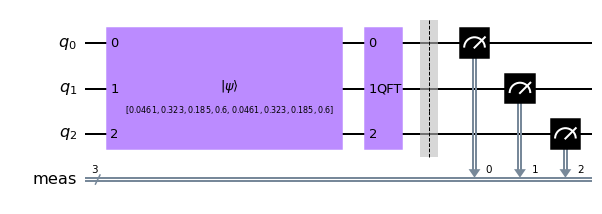

In [10]:
circ.append(QFT(3), [0, 1, 2])
circ.measure_all()
display(circ.draw('mpl'))

5c61fabf-027b-49c9-bff3-63dbe95830a0
{'000': 686, '100': 242, '110': 30, '010': 42}


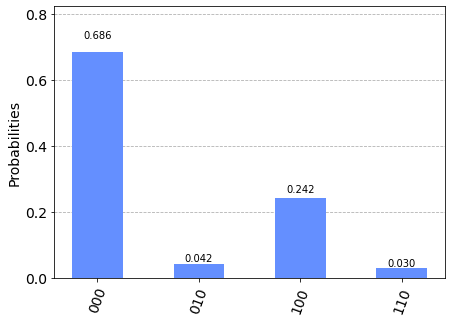

In [11]:
device = Aer.get_backend('qasm_simulator')
job = execute(circ, backend = device, shots=1000)
print(job.job_id())
result = job.result()
counts = result.get_counts(circ)
print(counts)
display(plot_histogram(counts))